<a href="https://colab.research.google.com/github/rhs329/boostcourse-4-/blob/main/5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [261]:
df = pd.read_csv("/content/diabetes_feature.csv")
df.shape

(768, 16)

In [318]:
df_insulin = pd.read_csv("/content/diabetes_fill_insulin.csv")
df["Insulin"] = df_insulin["Insulin"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,178.991371,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,66.832576,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,187.980926,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94.000000,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168.000000,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [319]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,178.991371,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,66.832576,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,187.980926,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94.000000,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168.000000,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [321]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [265]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin']]
X.shape

(768, 8)

In [322]:
y = df['Outcome']
y.shape

(768,)

In [326]:
(df["Insulin"] > 0).value_counts()

,count
Insulin,
True,768


In [327]:
#train 세트 만들기
train = df[df["Insulin"] > 0].copy()
train.shape

(768, 16)

In [328]:
#test 세트 만들기
test = df[df["Insulin"] == 0].copy()
test.shape

(0, 16)

## EDA

/tmp/ipython-input-1491181672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Insulin"])


<Axes: xlabel='Insulin', ylabel='Density'>

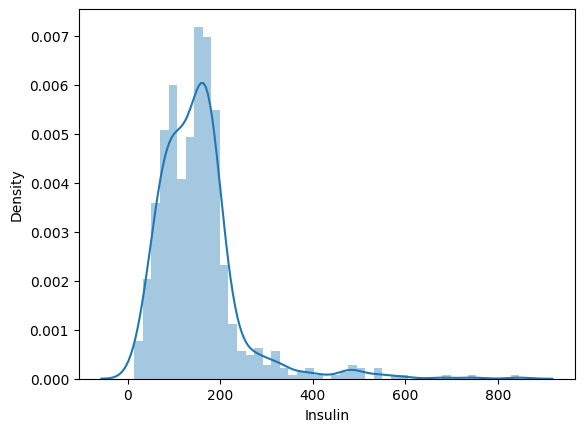

In [269]:
sns.distplot(train["Insulin"])

<Axes: ylabel='Insulin'>

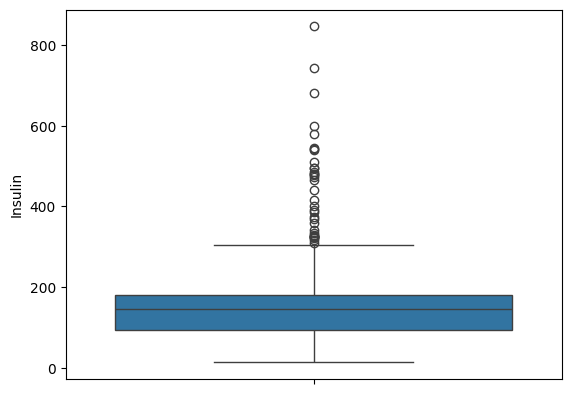

In [270]:
sns.boxplot(train["Insulin"])

In [271]:
desc = train["Insulin"].describe()
desc

,Insulin
count,768.000000
mean,151.274652
std,89.847654
min,14.000000
25%,94.214743
50%,144.871682
75%,180.261607
max,846.000000


In [272]:
# IQR : 3IQR - 1IQR
# OUT > SIQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [273]:
train[train[["Insulin"]] > OUT].shape

(768, 16)

In [274]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(768, 16)


(732, 16)

In [275]:
feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Pregnancies_high',
 'Age_low',
 'Age_middle',
 'Age_high',
 'Insulin_nan',
 'Insulin_log',
 'low_glu_insulin']

In [276]:
label_name = "Insulin"
label_name

'Insulin'

In [277]:
X_train = train[feature_names]
X_train.shape

(732, 15)

In [278]:
y_train = train[label_name]
y_train.shape

(732,)

In [279]:
X_test = test[feature_names]
X_test.shape

(0, 15)

In [280]:
y_test = test[label_name]
y_test.shape

(0,)

## 머신러닝 알고리즘 가져오기

In [329]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42)]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

In [330]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([12, 22, 21, 21, 19, 24, 27,  6, 19, 15])

In [331]:
results = [ ]
for estimator in estimators:
    result = [ ]
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [332]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.94547807, 0.90313366, 0.35547583, 0.93418083, 0.89346033,
       0.43562011, 0.4675821 , 0.8119429 , 0.61258881, 0.72008112])

In [333]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []


    max_depth = np.random.randint(5, 30, 10)
    max_features = np.random.uniform(0.3, 1.0, 10)

    param_distributions = {"max_depth" : max_depth, "max_features" : max_features }

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=10,
        scoring=None,
        n_jobs=None,
        cv=5,
        verbose=2,
        random_state=42)

    regressor.fit(X_train, y_train)

    results.append([
            estimator.__class__.__name__,
            regressor.best_params_,
            regressor.best_estimator_,
            regressor.best_score_,
            regressor.cv_results_
        ])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........max_depth=8, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=8, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=8, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=8, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=8, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=9, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=9, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=9, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=9, max_features=0.818448047513664; total time=   0.0s
[CV] END ........max_depth=9, max_features=0.818448047513664; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.8182414446690369; total time=   0.0s
[CV] END .......max_depth=7, max_features=0.8182

In [336]:
df_cv = pd.DataFrame(results,
                     columns = ["model", "params", "estimator", "score", "cv_result"])
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.8182414446690369, 'max_dept...","DecisionTreeRegressor(max_depth=np.int64(7),\n...",0.038934,"{'mean_fit_time': [0.0047872066497802734, 0.00..."
1,RandomForestRegressor,"{'max_features': 0.42886626018543594, 'max_dep...","(DecisionTreeRegressor(max_depth=np.int64(7),\...",0.336452,"{'mean_fit_time': [0.2541459560394287, 0.25212..."
2,GradientBoostingRegressor,"{'max_features': 0.3280116814625931, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.320263,"{'mean_fit_time': [0.2726679801940918, 0.26796..."


In [335]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(max_depth=np.int64(7),
                      max_features=np.float64(0.42886626018543594),
                      random_state=42)

In [288]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=np.int64(20),
                      max_features=np.float64(0.5330893017738076),
                      random_state=42)

In [289]:
regressor.best_params_

{'max_features': np.float64(0.6482704641236159), 'max_depth': np.int64(7)}

In [290]:
regressor.best_estimator_

GradientBoostingRegressor(max_depth=np.int64(7),
                          max_features=np.float64(0.6482704641236159),
                          random_state=42)

In [291]:
regressor.best_score_

np.float64(0.9761901876850707)

In [292]:
regressor.cv_results_

{'mean_fit_time': array([0.47504315, 0.50645523, 0.2742331 , 0.34131207, 0.43580847,
        0.30980964, 0.17462921, 0.4998991 , 0.49870405, 0.44957738]),
 'std_fit_time': array([0.08435681, 0.09253565, 0.00509252, 0.00789475, 0.01307991,
        0.00978669, 0.00495412, 0.08207056, 0.08218428, 0.0065353 ]),
 'mean_score_time': array([0.00527697, 0.00559173, 0.00361066, 0.00485358, 0.00443988,
        0.00546951, 0.00319524, 0.00534091, 0.00566764, 0.00484538]),
 'std_score_time': array([6.69967617e-04, 9.76166137e-04, 6.55662873e-04, 7.77298694e-04,
        1.17738076e-04, 8.31947895e-04, 5.47912193e-04, 6.87765040e-04,
        1.03567557e-03, 6.64376376e-05]),
 'param_max_features': masked_array(data=[0.6437604636499097, 0.6437604636499097,
                    0.6482704641236159, 0.4915127895386737,
                    0.6712916533605615, 0.372908345547886,
                    0.5246228155906807, 0.6482704641236159,
                    0.6482704641236159, 0.6482704641236159],
        

In [293]:
#학습, 훈련
model.fit(X_train, y_train)

AttributeError: 'list' object has no attribute 'fit'

In [294]:
#cross validation
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


array([176.37172957,  71.99377768, 185.14266928,  88.03803979,
       169.8785999 ])

In [295]:
(y_predict == y_train).sum()

np.int64(0)

In [296]:
len(y_train)

732

<Axes: xlabel='Insulin'>

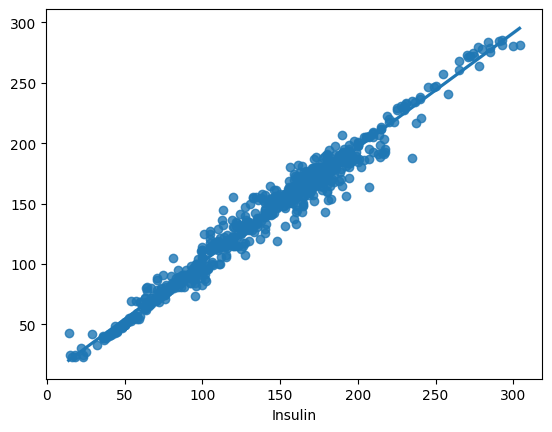

In [297]:
sns.regplot(x=y_train, y=y_predict)

In [298]:
from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.9726415016005738

/tmp/ipython-input-3053896909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, label="train")
/tmp/ipython-input-3053896909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, hist=False, label="predict")


<Axes: xlabel='Insulin', ylabel='Density'>

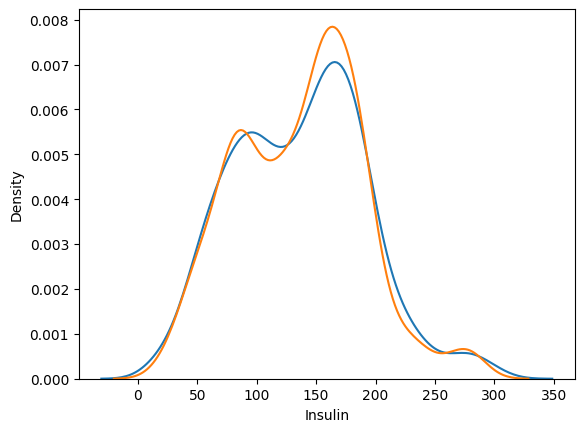

In [299]:
sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_predict, hist=False, label="predict")

## 오차 구하기

In [300]:
#MAE
#86 -> 77.5 -> 62.05 -> 44.385

error = abs(y_train - y_predict)
error.mean()

np.float64(6.247153018337279)

/tmp/ipython-input-1567266927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Insulin', ylabel='Density'>

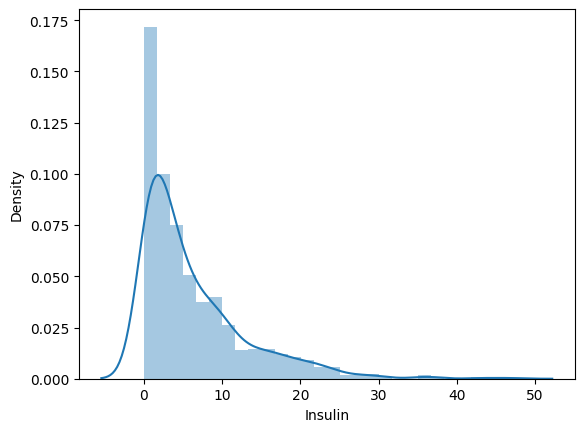

In [301]:
sns.distplot(error)

In [302]:
error.describe()

,Insulin
count,732.000000
mean,6.247153
std,6.769388
min,0.007188
25%,1.307804
50%,3.925212
75%,8.987948
max,46.747983


In [303]:
#RMSE
# 126.895 -> 114.077 -> 84 ->59.68

np.sqrt(((y_train - y_predict) ** 2).mean())

np.float64(9.20809070851043)

## 트리 알고리즘 분석

In [304]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names = feature_names,
                 filled=True, fontsize=10)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got [DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)] instead.

<Figure size 2000x2000 with 0 Axes>

In [305]:
# 피처의 중요도
best_estimator.feature_importances_

array([0.00393406, 0.11662951, 0.00519038, 0.03552906, 0.01104333,
       0.00770216, 0.01974235, 0.0065031 , 0.00056841, 0.00080626,
       0.00042351, 0.00394127, 0.3433495 , 0.34951445, 0.09512267])

<Axes: >

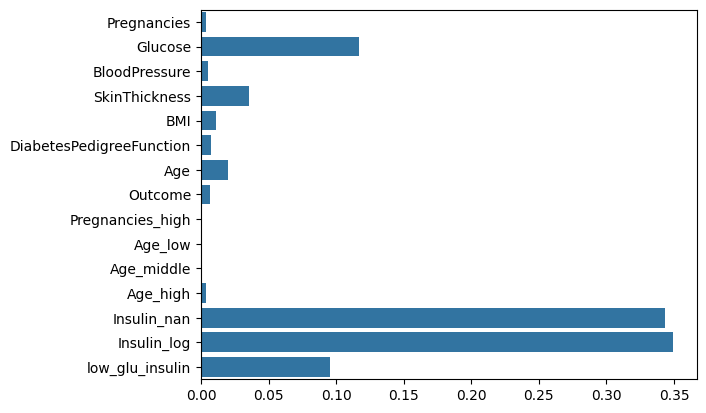

In [306]:
sns.barplot(x = best_estimator.feature_importances_, y=feature_names)

## 예측

In [307]:
y_test = best_estimator.predict(X_test)
y_test[:5]

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by RandomForestRegressor.

In [308]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,484.0,120.876613,53.861137,15.0,79.617807,112.052291,159.807595,293.0
1,248.0,167.377631,45.565696,14.0,143.804962,167.907439,189.790044,304.0


In [309]:
test["Insulin"] = y_test

In [310]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max


<Axes: xlabel='Outcome', ylabel='Insulin'>

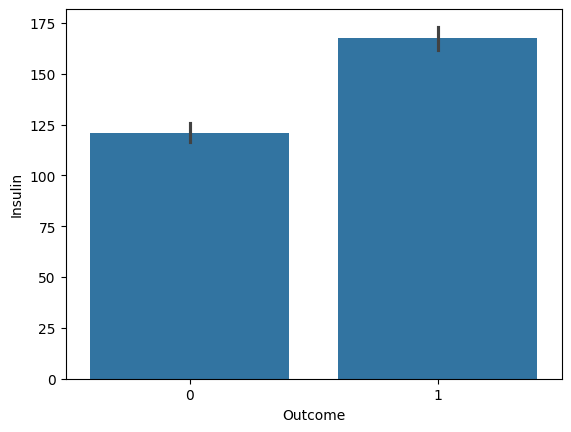

In [311]:
#인슐린 평균값
sns.barplot(data=train, x="Outcome", y="Insulin")

<Axes: >

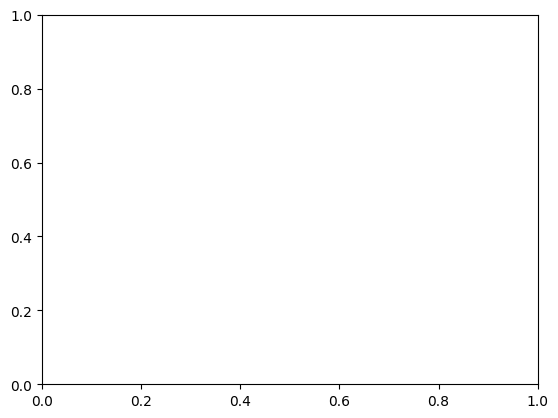

In [312]:
sns.barplot(data=test, x="Outcome", y="Insulin")

## 예측값을 csv 파일로 저장하기

In [313]:
df.loc[df["Insulin"] == 0, "Insulin"]

,Insulin


In [314]:
test["Insulin"]

,Insulin


In [315]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [316]:
df.to_csv("/content/diabetes_fill_insulin.csv", index=False)

In [317]:
pd.read_csv("/content/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,178.991371,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,66.832576,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,187.980926,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94.000000,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168.000000,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0,True,False,False,True,180.0,5.198497,False
764,2,122,70,27,158.693308,36.8,0.340,27,0,False,True,False,False,102.5,4.639572,False
765,5,121,72,23,112.000000,26.2,0.245,30,0,False,False,True,False,112.0,4.727388,False
766,1,126,60,0,171.664324,30.1,0.349,47,1,False,False,True,False,169.5,5.138735,False
